### 목표
- 서현, 형종 얼굴을 분류하는 이진분류 모델을 만들어보자!
- 학습용 데이터가 아닌 실제 이미지 데이터를 활용해보자!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#PIL : 이미지 처리에 관련된 라이브러리
from PIL import Image 
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

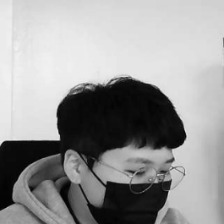

In [2]:
# 이미지를 가져와서 흑백으로 변환
# convert -> L : 흑백, RGB : 컬러
img = Image.open("/content/drive/MyDrive/Colab Notebooks/data/Class 1-samples/0.jpg").convert("L")
img

In [3]:
img_array = np.array(img)    # 검은색일수록 0 흰색일수록255
img_array

array([[224, 224, 224, ..., 208, 208, 208],
       [224, 224, 224, ..., 208, 208, 208],
       [225, 225, 225, ..., 208, 208, 208],
       ...,
       [151, 153, 154, ..., 152, 146, 142],
       [152, 153, 154, ..., 154, 148, 144],
       [155, 156, 157, ..., 155, 149, 145]], dtype=uint8)

In [4]:
img_array.shape

(224, 224)

In [5]:
# for문 실행시 어느정도 실행되고 있는지 %로 알려주는 라이브러리
from tqdm import tqdm

In [6]:
# 데이터셋 구성하기
class1_list = [] # 서현
class2_list = [] # 형종

for i in tqdm(range(200)):
  # 서현 데이터 작업
  # 경로와 이름에 맞게 이미지를 가져와서 흑백으로 변환한 후 img1변수에 담아주기
  img1 = Image.open("/content/drive/MyDrive/Colab Notebooks/data/Class 1-samples/"+str(i)+".jpg").convert("L")
  # 이미지 데이터가 저장된 img1을 numpy 배열로 변환
  img_array1 = np.array(img1)
  # numpy배열 데이터를 빈 리스트에 하나씩 추가해주기!
  class1_list.append(img_array1)
for i in tqdm(range(200)):
  # 형종 데이터 작업
  
  img2 = Image.open(f"/content/drive/MyDrive/Colab Notebooks/data/Class 2-samples/{str(i)}.jpg").convert("L")
  img_array2 = np.array(img2)
  class2_list.append(img_array2)

100%|██████████| 200/200 [00:46<00:00,  4.28it/s]


In [7]:
class1_list

[array([[224, 224, 224, ..., 208, 208, 208],
        [224, 224, 224, ..., 208, 208, 208],
        [225, 225, 225, ..., 208, 208, 208],
        ...,
        [151, 153, 154, ..., 152, 146, 142],
        [152, 153, 154, ..., 154, 148, 144],
        [155, 156, 157, ..., 155, 149, 145]], dtype=uint8),
 array([[226, 225, 225, ..., 208, 208, 208],
        [226, 226, 225, ..., 208, 208, 208],
        [227, 226, 226, ..., 208, 208, 208],
        ...,
        [152, 152, 153, ..., 158, 154, 146],
        [152, 153, 153, ..., 160, 155, 147],
        [156, 157, 156, ..., 161, 156, 148]], dtype=uint8),
 array([[223, 222, 222, ..., 204, 204, 204],
        [222, 222, 221, ..., 204, 205, 205],
        [222, 222, 222, ..., 205, 205, 206],
        ...,
        [145, 146, 147, ..., 156, 151, 148],
        [144, 147, 149, ..., 157, 153, 150],
        [148, 153, 154, ..., 158, 154, 151]], dtype=uint8),
 array([[225, 225, 224, ..., 204, 204, 204],
        [225, 225, 224, ..., 204, 205, 205],
        [225, 22

In [8]:
# 리스트 자체도 numpy 배열로 변환
# 사진 하나하나도 numpy배욜로, 이를 담고 있는 리스트도 numpy배열로 변환시켜주기!
#(모델 학습시킬수 있는 자료는 dataFrame 이나 numpy배열)
class1_numpy = np.array(class1_list)
class2_numpy = np.array(class2_list)

In [9]:
class1_numpy.shape

(200, 224, 224)

In [10]:
# concatenate : 두 배열을 순서대로 붙여주기
data = np.concatenate((class1_numpy, class2_numpy))
# 문제 데이터 생성 완료!
data.shape

(400, 224, 224)

In [11]:
# 정답 데이터 만들기(문제와 정답이 순서는 일정해야 함)
# 0 : 서현이 데이터 답, 1: 형종 데이터 답
target = np.array([0]*200 + [1]*200)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
target.shape

(400,)

In [13]:
# 학습, 평가 데이터 분리하기
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,
                                                 test_size=0.2,
                                                 random_state=111
                                                 )

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(320, 224, 224)
(320,)
(80, 224, 224)
(80,)


### 서현, 형종 이미지를 분류하는 신경망 모델을 직접 만들어보자
- 이진분류 문제
- 출력층 뉴런수, 활성화함수
- loss값

In [15]:
model = Sequential()

model.add(Flatten(input_shape=(224,224)))
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['acc']
)

In [17]:
h=model.fit(X_train,y_train,
            validation_split=0.2,
            batch_size=128,
            epochs=100)

Epoch 1/100
2/2 [==============================] - 4s 281ms/step - loss: 0.7047 - acc: 0.5039 - val_loss: 0.6888 - val_acc: 0.5469
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.7016 - acc: 0.5039 - val_loss: 0.6870 - val_acc: 0.5469
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6982 - acc: 0.5039 - val_loss: 0.6860 - val_acc: 0.5469
Epoch 4/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6960 - acc: 0.5039 - val_loss: 0.6851 - val_acc: 0.5469
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6943 - acc: 0.5039 - val_loss: 0.6847 - val_acc: 0.5469
Epoch 6/100
2/2 [==============================] - 0s 50ms/step - loss: 0.6930 - acc: 0.5039 - val_loss: 0.6842 - val_acc: 0.5469
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6916 - acc: 0.5039 - val_loss: 0.6841 - val_acc: 0.5469
Epoch 8/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6906 - acc: 0.5

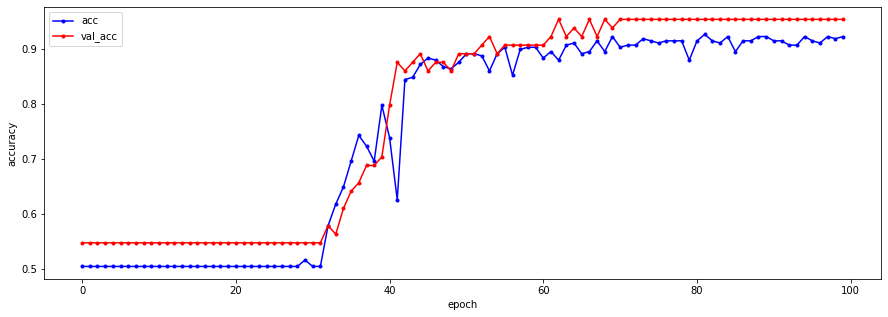

In [18]:
plt.figure(figsize=(15,5))
plt.plot(h.history['acc'], label='acc', marker='.',c='blue')
plt.plot(h.history['val_acc'], label='val_acc',c='red', marker='.')
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend()
plt.show()

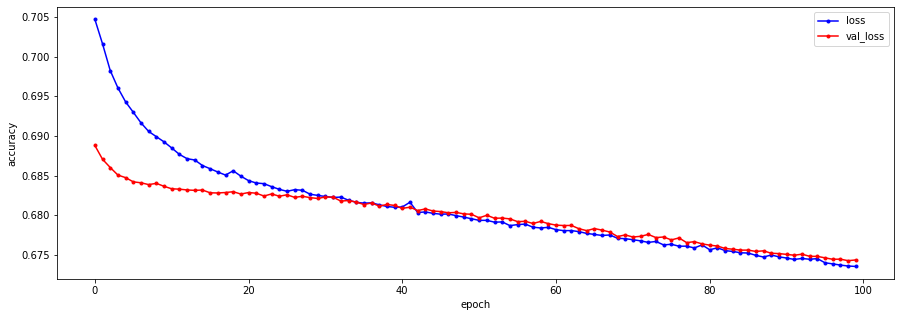

In [19]:
plt.figure(figsize=(15,5))
plt.plot(h.history['loss'], label='loss', marker='.',c='blue')
plt.plot(h.history['val_loss'], label='val_loss',c='red', marker='.')
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend()
plt.show()

In [20]:
# 4. 모델평가 
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 8ms/step - loss: 0.6735 - acc: 0.9500


[0.6735178232192993, 0.949999988079071]

In [21]:
model2 = Sequential()

model2.add(Flatten(input_shape=(224,224)))
model2.add(Dense(500, activation='relu'))
model2.add(Dense(300, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(50, activation='relu'))

model2.add(Dense(1, activation='sigmoid'))

In [22]:
model2.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc']
)

In [23]:
h2=model2.fit(X_train,y_train,
            validation_split=0.2,
            batch_size=128,
            epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 66ms/step - loss: 0.6738 - acc: 0.9219 - val_loss: 0.6740 - val_acc: 0.9531
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6734 - acc: 0.9219 - val_loss: 0.6738 - val_acc: 0.9531
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6733 - acc: 0.9219 - val_loss: 0.6738 - val_acc: 0.9531
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 0.6732 - acc: 0.9180 - val_loss: 0.6737 - val_acc: 0.9531
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 0.6730 - acc: 0.9180 - val_loss: 0.6736 - val_acc: 0.9531
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6728 - acc: 0.9258 - val_loss: 0.6735 - val_acc: 0.9531
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 0.6728 - acc: 0.9258 - val_loss: 0.6733 - val_acc: 0.9531
Epoch 8/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6727 - acc: 0.90

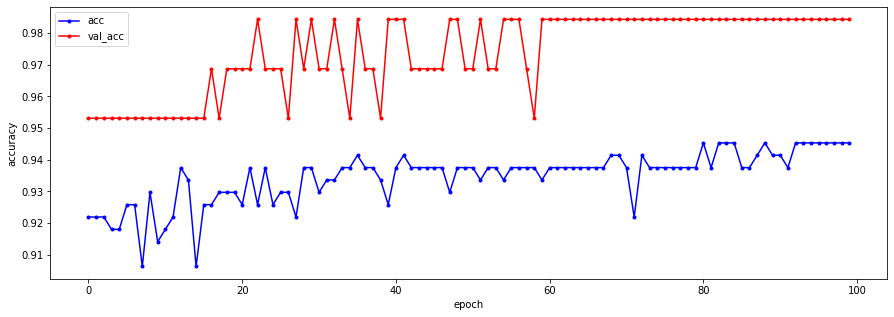

In [24]:
plt.figure(figsize=(15,5))
plt.plot(h2.history['acc'], label='acc', marker='.',c='blue')
plt.plot(h2.history['val_acc'], label='val_acc',c='red', marker='.')
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend()
plt.show()

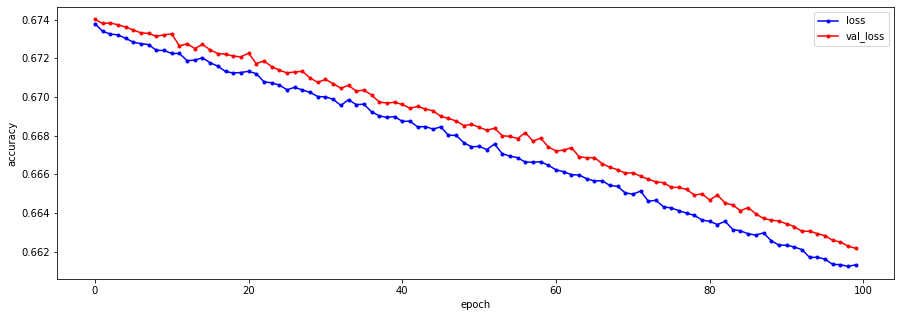

In [25]:
plt.figure(figsize=(15,5))
plt.plot(h2.history['loss'], label='loss', marker='.',c='blue')
plt.plot(h2.history['val_loss'], label='val_loss',c='red', marker='.')
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.legend()
plt.show()

In [27]:
# 4. 모델평가 
model2.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 31.6264 - acc: 0.5500


[31.626392364501953, 0.550000011920929]